In [1]:
import sys
if sys.platform == "darwin":  # michael's config
    # because Michael is using jupyter lab
    %load_ext lab_black
else:  # zade's config
    # because Zade is using jupyter notebook
    %load_ext nb_black

## Tasks

I have put several more utility functions into the coverage_utils module, have a look at all of them to understand what they do.

Update: I added the CoverageCalculator, making things much easier...
Update2: Initial investigations of results renders it necessary to create below new database for all three cases of fans, blotches and both areas considered in the union. I added a switch in the class that enables that kind of analysis. See below..
Next tasks are:

* [x] combine below code into a function with the name `calc_coverage(region_name)` that returns the pandas dataframe with the results (basically combining below cells into a function) but add a region_name column (same for all rows), in preparation for next task.
* [x] run a loop over all available region names (see below for how to get that list).
    * [ ] store each returned dataframe in a bucket list
    - Did the above inefficiently, still works (no bucket list)
    * [x] run each obsid three times, for `which` settings of 'both', 'fans' and 'blotches'
    * [x] combine the bucket into a larger dataframe that has all results
    * [x] save as CSV file using df.to_csv(...)
* [x] Develep a plot function with the cells below, that conveniently reads the data out the above stored large dataframe and creates the plot, using the options as below.

# CoverageCalculator class

I wrote a class because it's much more efficient to keep the fans, blotches and metadata in memory and not read it in everytime. 
Keep that in mind for the future: When you need to read a data object often, it is more efficient to write a class that keeps that data in memory while you change a parameter (here: obsid) for different analyses.

This class reads in the general data files once and you can then use it in a loop by setting the obsid value as shown below.

In [2]:
import pandas as pd
import numpy as np

<IPython.core.display.Javascript object>

In [3]:
from coverage_utils import CoverageCalculator, get_obsids_for_region
from my_io import get_tilecoords, get_metadata, get_region_names

<IPython.core.display.Javascript object>

In [4]:
from coverage_utils import CoverageCalculator, get_obsids_for_region
from my_io import get_tilecoords, get_metadata, get_region_names

<IPython.core.display.Javascript object>

In [5]:
# make sure our csv works
p_data = pd.read_csv("final_df.csv")

<IPython.core.display.Javascript object>

In [6]:
p_data.head()

,Latitude,Ls,MY,fraction,obsid,region_name,which
0,-85.4074,214.785,29,0.115,ESP_012079_0945,Macclesfield,both
1,-85.4065,183.727,29,0.070,ESP_011407_0945,Macclesfield,both
2,-85.4056,198.040,29,0.072,ESP_011723_0945,Macclesfield,both
3,-85.4049,207.892,29,0.168,ESP_011934_0945,Macclesfield,both
4,-85.4067,235.282,29,0.111,ESP_012501_0945,Macclesfield,both


<IPython.core.display.Javascript object>

In [8]:
from coverage_utils import CoverageCalculator, get_obsids_for_region
from my_io import get_tilecoords, get_metadata, get_region_names

<IPython.core.display.Javascript object>

In [9]:
p_data

<IPython.core.display.Javascript object>

In [10]:
p_data.head()

<IPython.core.display.Javascript object>

In [11]:
grp_both.head()

<IPython.core.display.Javascript object>

In [21]:
fig, axes = plt.subplots(ncols=3, figsize=(10, 4))
for ax, select in zip(axes, ["both", "fans", "blotches"]):
    subdf = p_data.loc[p_data["which"] == select]
    for year in [29, 30]:
        subdf2 = subdf.loc[subf["MY"] == year]
        subdf2.groupby("Ls").count()
        ax.plot(subdf2, x="Ls", y="fraction")
        ax2 = ax.twinx()
        ax2.plot()

,Latitude,Ls,MY,fraction,obsid,region_name,which
0,-85.4074,214.785,29,0.037,ESP_012079_0945,Macclesfield,blotches
1,-85.4065,183.727,29,0.029,ESP_011407_0945,Macclesfield,blotches
2,-85.4056,198.040,29,0.032,ESP_011723_0945,Macclesfield,blotches
3,-85.4049,207.892,29,0.057,ESP_011934_0945,Macclesfield,blotches
4,-85.4067,235.282,29,0.021,ESP_012501_0945,Macclesfield,blotches


<IPython.core.display.Javascript object>

In [21]:
fig, axes = plt.subplots(ncols=3, figsize=(10, 4))
for ax, select in zip(axes, ["both", "fans", "blotches"]):
    subdf = p_data.loc[p_data["which"] == select]
    for year in [29, 30]:
        subdf2 = subdf.loc[subf["MY"] == year]
        subdf2.groupby("Ls").count()
        ax.plot(subdf2, x="Ls", y="fraction")
        ax2 = ax.twinx()
        ax2.plot()

,Latitude,Ls,MY,fraction,obsid,region_name,which
0,-85.4074,214.785,29,0.037,ESP_012079_0945,Macclesfield,blotches
1,-85.4065,183.727,29,0.029,ESP_011407_0945,Macclesfield,blotches
2,-85.4056,198.040,29,0.032,ESP_011723_0945,Macclesfield,blotches
3,-85.4049,207.892,29,0.057,ESP_011934_0945,Macclesfield,blotches
4,-85.4067,235.282,29,0.021,ESP_012501_0945,Macclesfield,blotches


<IPython.core.display.Javascript object>

In [12]:
# group 'both by region'
bbr = grp_both.groupby("region_name")

['Macclesfield',
 'Starburst',
 'Manhattan_Classic',
 'Wellington',
 'Albany',
 'Bilbao',
 'Ithaca',
 'Portsmouth',
 'Pisaq',
 'Manhattan_Frontinella',
 'BuenosAires',
 'Inca_City_Ridges',
 'Inca_City',
 'Giza',
 'Potsdam',
 'Troy',
 'Oswego_Edge',
 'Halifax',
 'Caterpillar',
 'Rochester',
 'Manhattan_Cracks',
 'Schenectady',
 'Binghamton',
 'Atka',
 'Cortland',
 'Geneseo']

<IPython.core.display.Javascript object>

In [13]:
all_regions = get_region_names().roi_name.unique()

,OBSERVATION_ID,IMAGE_CENTER_LATITUDE,IMAGE_CENTER_LONGITUDE,SOLAR_LONGITUDE,START_TIME,map_scale,north_azimuth,# of tiles
0,ESP_011296_0975,-82.1965,225.2530,178.833,2008-12-23 16:15:26,1.00,110.600107,91
1,ESP_011341_0980,-81.7969,76.1304,180.809,2008-12-27 04:25:02,0.50,110.208923,126
2,ESP_011348_0950,-85.0427,259.0940,181.117,2008-12-27 17:29:17,1.00,123.624057,91
3,ESP_011350_0945,-85.2160,181.4150,181.205,2008-12-27 21:14:01,0.50,99.672793,126
4,ESP_011351_0945,-85.2157,181.5480,181.249,2008-12-27 23:05:54,1.00,127.960688,91
5,ESP_011370_0980,-81.9247,4.8129,182.088,2008-12-29 10:39:09,0.50,110.580189,126
6,ESP_011394_0935,-86.3917,99.0685,183.150,2008-12-31 07:30:26,1.00,139.359081,72
7,ESP_011403_0945,-85.2394,181.0380,183.549,2009-01-01 00:21:03,0.50,106.472204,164
8,ESP_011404_0945,-85.2360,181.1050,183.594,2009-01-01 02:12:52,1.00,134.130277,91
9,ESP_011406_0945,-85.4086,103.9240,183.683,2009-01-01 05:57:35,0.50,111.346267,126


<IPython.core.display.Javascript object>

In [14]:
all_regions = [
    region for region in all_regions if region not in ["unknown", "Manhattan2"]
]

<IPython.core.display.Javascript object>

In [15]:
all_regions

Martian year: 29
Calculating obsid ESP_012079_0945
Calculating obsid ESP_011407_0945
Calculating obsid ESP_011723_0945
Calculating obsid ESP_011934_0945
Calculating obsid ESP_012501_0945
Calculating obsid ESP_012290_0945
Calculating obsid ESP_011406_0945
Martian year: 30
Calculating obsid ESP_021494_0945
Calculating obsid ESP_020782_0945
Calculating obsid ESP_020716_0945
Calculating obsid ESP_020571_0945
Calculating obsid ESP_020294_0945
Calculating obsid ESP_020927_0945
Calculating obsid ESP_020242_0945
Martian year: 29
Calculating obsid ESP_011697_0980
Calculating obsid ESP_011341_0980
Calculating obsid ESP_011842_0980
Calculating obsid ESP_011486_0980
Calculating obsid ESP_012607_0980
Calculating obsid ESP_012053_0980
Calculating obsid ESP_012264_0980
Martian year: 30
Calculating obsid ESP_020677_0980
Calculating obsid ESP_020756_0980
Calculating obsid ESP_021969_0980
Martian year: 29
Calculating obsid ESP_012884_0935
Calculating obsid ESP_012251_0935
Calculating obsid ESP_012739_09

Martian year: 30
Martian year: 29
Martian year: 30
Calculating obsid ESP_022193_0950


<IPython.core.display.Javascript object>

In [16]:
# gives calc_coverage results for all regions, which = 'fans'
calc_region_fans = [
    calc_coverage(region, which="fans") for region in all_regions
]

Martian year: 29
Calculating obsid ESP_012079_0945
Calculating obsid ESP_011407_0945
Calculating obsid ESP_011723_0945
Calculating obsid ESP_011934_0945
Calculating obsid ESP_012501_0945
Calculating obsid ESP_012290_0945
Calculating obsid ESP_011406_0945
Martian year: 30
Calculating obsid ESP_021494_0945
Calculating obsid ESP_020782_0945
Calculating obsid ESP_020716_0945
Calculating obsid ESP_020571_0945
Calculating obsid ESP_020294_0945
Calculating obsid ESP_020927_0945
Calculating obsid ESP_020242_0945
Martian year: 29
Calculating obsid ESP_011697_0980
Calculating obsid ESP_011341_0980
Calculating obsid ESP_011842_0980
Calculating obsid ESP_011486_0980
Calculating obsid ESP_012607_0980
Calculating obsid ESP_012053_0980
Calculating obsid ESP_012264_0980
Martian year: 30
Calculating obsid ESP_020677_0980
Calculating obsid ESP_020756_0980
Calculating obsid ESP_021969_0980
Martian year: 29
Calculating obsid ESP_012884_0935
Calculating obsid ESP_012251_0935
Calculating obsid ESP_012739_09

Martian year: 30
Martian year: 29
Martian year: 30
Calculating obsid ESP_022193_0950


<IPython.core.display.Javascript object>

In [17]:
# make something that takes region name, gives a range of min to max latitudes associated with the region name
# fans_per_obsid = fans.query("obsid == @obsid")
for region in x.region_name.unique():
    y = x.query("region_name == @region")
    print(y)

Martian year: 29
Calculating obsid ESP_012079_0945
Calculating obsid ESP_011407_0945
Calculating obsid ESP_011723_0945
Calculating obsid ESP_011934_0945
Calculating obsid ESP_012501_0945
Calculating obsid ESP_012290_0945
Calculating obsid ESP_011406_0945
Martian year: 30
Calculating obsid ESP_021494_0945
Calculating obsid ESP_020782_0945
Calculating obsid ESP_020716_0945
Calculating obsid ESP_020571_0945
Calculating obsid ESP_020294_0945
Calculating obsid ESP_020927_0945
Calculating obsid ESP_020242_0945
Martian year: 29
Calculating obsid ESP_011697_0980
Calculating obsid ESP_011341_0980
Calculating obsid ESP_011842_0980
Calculating obsid ESP_011486_0980
Calculating obsid ESP_012607_0980
Calculating obsid ESP_012053_0980
Calculating obsid ESP_012264_0980
Martian year: 30
Calculating obsid ESP_020677_0980
Calculating obsid ESP_020756_0980
Calculating obsid ESP_021969_0980
Martian year: 29
Calculating obsid ESP_012884_0935
Calculating obsid ESP_012251_0935
Calculating obsid ESP_012739_09

Martian year: 30
Martian year: 29
Martian year: 30
Calculating obsid ESP_022193_0950


<IPython.core.display.Javascript object>

In [18]:
x = grp_both[grp_both["region_name"].isin(all_regions)]

,Latitude,Ls,MY,fraction,obsid,region_name,which
0,-85.4074,214.785,29,0.115,ESP_012079_0945,Macclesfield,both
1,-85.4065,183.727,29,0.070,ESP_011407_0945,Macclesfield,both
2,-85.4056,198.040,29,0.072,ESP_011723_0945,Macclesfield,both
3,-85.4049,207.892,29,0.168,ESP_011934_0945,Macclesfield,both
4,-85.4067,235.282,29,0.111,ESP_012501_0945,Macclesfield,both


<IPython.core.display.Javascript object>

In [19]:
x.head()

,Latitude,Ls,MY,fraction,obsid,region_name,which
0,-85.4074,214.785,29,0.088,ESP_012079_0945,Macclesfield,fans
1,-85.4065,183.727,29,0.046,ESP_011407_0945,Macclesfield,fans
2,-85.4056,198.040,29,0.047,ESP_011723_0945,Macclesfield,fans
3,-85.4049,207.892,29,0.126,ESP_011934_0945,Macclesfield,fans
4,-85.4067,235.282,29,0.097,ESP_012501_0945,Macclesfield,fans


<IPython.core.display.Javascript object>

In [21]:
fig, axes = plt.subplots(ncols=3, figsize=(10, 4))
for ax, select in zip(axes, ["both", "fans", "blotches"]):
    subdf = p_data.loc[p_data["which"] == select]
    for year in [29, 30]:
        subdf2 = subdf.loc[subf["MY"] == year]
        subdf2.groupby("Ls").count()
        ax.plot(subdf2, x="Ls", y="fraction")
        ax2 = ax.twinx()
        ax2.plot()

,Latitude,Ls,MY,fraction,obsid,region_name,which
0,-85.4074,214.785,29,0.037,ESP_012079_0945,Macclesfield,blotches
1,-85.4065,183.727,29,0.029,ESP_011407_0945,Macclesfield,blotches
2,-85.4056,198.040,29,0.032,ESP_011723_0945,Macclesfield,blotches
3,-85.4049,207.892,29,0.057,ESP_011934_0945,Macclesfield,blotches
4,-85.4067,235.282,29,0.021,ESP_012501_0945,Macclesfield,blotches


<IPython.core.display.Javascript object>

In [57]:
# foo = df.ix[(df['column1']==value) | (df['columns2'] == 'b') | (df['column3'] == 'c')]
smallx = x.loc[(x["region_name"].isin(small_regions))]
largex = x.loc[(x["region_name"].isin(large_regions))]

[         Ls  MY  fraction            obsid   region_name
 0   214.785  29     0.115  ESP_012079_0945  Macclesfield
 1   183.727  29     0.070  ESP_011407_0945  Macclesfield
 2   198.040  29     0.072  ESP_011723_0945  Macclesfield
 3   207.892  29     0.168  ESP_011934_0945  Macclesfield
 4   235.282  29     0.111  ESP_012501_0945  Macclesfield
 5   224.964  29     0.087  ESP_012290_0945  Macclesfield
 6   183.683  29     0.074  ESP_011406_0945  Macclesfield
 7   243.978  30     0.049  ESP_021494_0945  Macclesfield
 8   209.383  30     0.075  ESP_020782_0945  Macclesfield
 9   206.269  30     0.062  ESP_020716_0945  Macclesfield
 10  199.501  30     0.065  ESP_020571_0945  Macclesfield
 11  186.879  30     0.080  ESP_020294_0945  Macclesfield
 12  216.293  30     0.079  ESP_020927_0945  Macclesfield
 13  184.557  30     0.054  ESP_020242_0945  Macclesfield,
         Ls  MY  fraction            obsid region_name
 0  241.144  29     0.068  ESP_012620_0975     unknown
 1  224.333  29    

<IPython.core.display.Javascript object>

In [22]:
fig, axes = plt.subplots(ncols=3, figsize=(10, 4))
for ax, select in zip(axes, ["both", "fans", "blotches"]):
    subdf = p_data.loc[p_data["which"] == select]
    for year in [29, 30]:
        subdf2 = subdf.loc[subdf["MY"] == year]
        subdf2.groupby("Ls").count()
        ax.plot(subdf2, x="Ls", y="fraction")
        ax2 = ax.twinx()
        ax2.plot()

<IPython.core.display.Javascript object>

In [23]:
fig, axes = plt.subplots(ncols=3, figsize=(10, 4))
for ax, select in zip(axes, ["both", "fans", "blotches"]):
    subdf = p_data.loc[p_data["which"] == select]
    for year in [29, 30]:
        subdf2 = subdf.loc[subdf["MY"] == year]
        subdf2.groupby("Ls").count()
        ax.plot(data=subdf2, x="Ls", y="fraction")
        ax2 = ax.twinx()
        ax2.plot()

<IPython.core.display.Javascript object>

In [24]:
fig, axes = plt.subplots(ncols=3, figsize=(10, 4))
for ax, select in zip(axes, ["both", "fans", "blotches"]):
    subdf = p_data.loc[p_data["which"] == select]
    for year in [29, 30]:
        subdf2 = subdf.loc[subdf["MY"] == year]
        subdf2.groupby("Ls").count()
        ax.plot("Ls", "fraction", data=subdf2)
        ax2 = ax.twinx()
        ax2.plot()

<IPython.core.display.Javascript object>

In [25]:
fig, axes = plt.subplots(ncols=3, figsize=(10, 4))
for ax, select in zip(axes, ["both", "fans", "blotches"]):
    subdf = p_data.loc[p_data["which"] == select]
    for year in [29, 30]:
        subdf2 = subdf.loc[subdf["MY"] == year]
        subdf2.groupby("Ls").count()
        ax.scatter("Ls", "fraction", data=subdf2)
        ax2 = ax.twinx()
        ax2.plot()

,Latitude,Ls,MY,fraction,obsid,region_name,which
0,-85.4074,214.785,29,0.115,ESP_012079_0945,Macclesfield,both
1,-85.4065,183.727,29,0.070,ESP_011407_0945,Macclesfield,both
2,-85.4056,198.040,29,0.072,ESP_011723_0945,Macclesfield,both
3,-85.4049,207.892,29,0.168,ESP_011934_0945,Macclesfield,both
4,-85.4067,235.282,29,0.111,ESP_012501_0945,Macclesfield,both
5,-85.4117,224.964,29,0.087,ESP_012290_0945,Macclesfield,both
6,-85.4086,183.683,29,0.074,ESP_011406_0945,Macclesfield,both
7,-85.4041,243.978,30,0.049,ESP_021494_0945,Macclesfield,both
8,-85.4071,209.383,30,0.075,ESP_020782_0945,Macclesfield,both
9,-85.4086,206.269,30,0.062,ESP_020716_0945,Macclesfield,both


<IPython.core.display.Javascript object>

In [26]:
fig, axes = plt.subplots(ncols=3, figsize=(5, 4))
for ax, select in zip(axes, ["both", "fans", "blotches"]):
    subdf = p_data.loc[p_data["which"] == select]
    for year in [29, 30]:
        subdf2 = subdf.loc[subdf["MY"] == year]
        subdf2.groupby("Ls").count()
        ax.scatter("Ls", "fraction", data=subdf2)
        ax2 = ax.twinx()
        ax2.plot()

<IPython.core.display.Javascript object>

In [27]:
fig, axes = plt.subplots(ncols=3, figsize=(10, 4))
for ax, select in zip(axes, ["both", "fans", "blotches"]):
    subdf = p_data.loc[p_data["which"] == select]
    for year in [29, 30]:
        subdf2 = subdf.loc[subdf["MY"] == year]
        subdf2.groupby("Ls").count()
        ax.scatter("Ls", "fraction", data=subdf2)
        ax2 = ax.twinx()
        ax2.plot()

,Latitude,Ls,MY,fraction,obsid,region_name,which
0,-85.4074,214.785,29,0.115,ESP_012079_0945,Macclesfield,both
1,-85.4065,183.727,29,0.070,ESP_011407_0945,Macclesfield,both
2,-85.4056,198.040,29,0.072,ESP_011723_0945,Macclesfield,both
3,-85.4049,207.892,29,0.168,ESP_011934_0945,Macclesfield,both
4,-85.4067,235.282,29,0.111,ESP_012501_0945,Macclesfield,both


<IPython.core.display.Javascript object>

In [28]:
# make something that takes region name, gives a range of min to max latitudes associated with the region name
# fans_per_obsid = fans.query("obsid == @obsid")
for region in x.region_name.unique():
    y = x.query("region_name == @region")
    newy = y["Latitude"].mean()
    print(newy.length())

<IPython.core.display.Javascript object>

In [29]:
# make something that takes region name, gives a range of min to max latitudes associated with the region name
# fans_per_obsid = fans.query("obsid == @obsid")
for region in x.region_name.unique():
    y = x.query("region_name == @region")
    newy = y["Latitude"].mean()
    print(newy)

,Latitude,Ls,MY,fraction,obsid,region_name,which
0,-85.4074,214.785,29,0.115,ESP_012079_0945,Macclesfield,both
1,-85.4065,183.727,29,0.070,ESP_011407_0945,Macclesfield,both
2,-85.4056,198.040,29,0.072,ESP_011723_0945,Macclesfield,both
3,-85.4049,207.892,29,0.168,ESP_011934_0945,Macclesfield,both
4,-85.4067,235.282,29,0.111,ESP_012501_0945,Macclesfield,both
5,-85.4117,224.964,29,0.087,ESP_012290_0945,Macclesfield,both
6,-85.4086,183.683,29,0.074,ESP_011406_0945,Macclesfield,both
7,-85.4041,243.978,30,0.049,ESP_021494_0945,Macclesfield,both
8,-85.4071,209.383,30,0.075,ESP_020782_0945,Macclesfield,both
9,-85.4086,206.269,30,0.062,ESP_020716_0945,Macclesfield,both


<IPython.core.display.Javascript object>

In [30]:
all_regions

Latitude              -85.4074
Ls                     214.785
MY                          29
fraction                 0.115
obsid          ESP_012079_0945
region_name       Macclesfield
which                     both
Name: 0, dtype: object

<IPython.core.display.Javascript object>

In [31]:
all_regions[-1]

<IPython.core.display.Javascript object>

In [32]:
allregions[-1]["Latitude"].mean()

Martian year: 29
Calculating obsid ESP_011931_0945
Calculating obsid ESP_012063_0945
Calculating obsid ESP_011350_0945
Calculating obsid ESP_012076_0945
Calculating obsid ESP_012643_0945
Calculating obsid ESP_012854_0945
Calculating obsid ESP_011351_0945
Calculating obsid ESP_011404_0945
Calculating obsid ESP_011403_0945
Calculating obsid ESP_012858_0855
Martian year: 30
Calculating obsid ESP_020357_0950
Calculating obsid ESP_020476_0950
Calculating obsid ESP_021491_0950
Calculating obsid ESP_020779_0950
Calculating obsid ESP_020146_0950
Calculating obsid ESP_020568_0950


,Latitude,Ls,MY,fraction,obsid,region_name,which
0,-85.2100,207.751,29,0.144,ESP_011931_0945,ithaca,blotches
1,-85.2101,214.020,29,0.154,ESP_012063_0945,ithaca,blotches
2,-85.2160,181.205,29,0.044,ESP_011350_0945,ithaca,blotches
3,-85.2099,214.641,29,0.156,ESP_012076_0945,ithaca,blotches
4,-85.2084,242.279,29,0.163,ESP_012643_0945,ithaca,blotches
5,-85.2857,252.710,29,0.132,ESP_012854_0945,ithaca,blotches
6,-85.2157,181.249,29,0.019,ESP_011351_0945,ithaca,blotches
7,-85.2360,183.594,29,0.016,ESP_011404_0945,ithaca,blotches
8,-85.2394,183.549,29,0.015,ESP_011403_0945,ithaca,blotches
9,-85.2751,252.907,29,0.150,ESP_012858_0855,ithaca,blotches


<IPython.core.display.Javascript object>

In [40]:
1.5 * 10 ^ 8 / 15

Martian year: 29
Calculating obsid ESP_011931_0945
Calculating obsid ESP_012063_0945
Calculating obsid ESP_011350_0945
Calculating obsid ESP_012076_0945
Calculating obsid ESP_012643_0945
Calculating obsid ESP_012854_0945
Calculating obsid ESP_011351_0945
Calculating obsid ESP_011404_0945
Calculating obsid ESP_011403_0945
Calculating obsid ESP_012858_0855
Martian year: 30
Calculating obsid ESP_020357_0950
Calculating obsid ESP_020476_0950
Calculating obsid ESP_021491_0950
Calculating obsid ESP_020779_0950
Calculating obsid ESP_020146_0950
Calculating obsid ESP_020568_0950


,Ls,MY,fraction,obsid,region_name
0,207.751,29,0.134,ESP_011931_0945,ithaca
1,214.020,29,0.113,ESP_012063_0945,ithaca
2,181.205,29,0.060,ESP_011350_0945,ithaca
3,214.641,29,0.109,ESP_012076_0945,ithaca
4,242.279,29,0.101,ESP_012643_0945,ithaca
5,252.710,29,0.141,ESP_012854_0945,ithaca
6,181.249,29,0.040,ESP_011351_0945,ithaca
7,183.594,29,0.105,ESP_011404_0945,ithaca
8,183.549,29,0.080,ESP_011403_0945,ithaca
9,252.907,29,0.119,ESP_012858_0855,ithaca


<IPython.core.display.Javascript object>

In [37]:
sqrt((1 / 100) + (1 / 400) + (1 / 225))

Martian year: 29
Calculating obsid ESP_011931_0945
Calculating obsid ESP_012063_0945
Calculating obsid ESP_011350_0945
Calculating obsid ESP_012076_0945
Calculating obsid ESP_012643_0945
Calculating obsid ESP_012854_0945
Calculating obsid ESP_011351_0945
Calculating obsid ESP_011404_0945
Calculating obsid ESP_011403_0945
Calculating obsid ESP_012858_0855
Martian year: 30
Calculating obsid ESP_020357_0950
Calculating obsid ESP_020476_0950
Calculating obsid ESP_021491_0950
Calculating obsid ESP_020779_0950
Calculating obsid ESP_020146_0950
Calculating obsid ESP_020568_0950


,Ls,MY,fraction,obsid,region_name
0,207.751,29,0.225,ESP_011931_0945,ithaca
1,214.020,29,0.212,ESP_012063_0945,ithaca
2,181.205,29,0.091,ESP_011350_0945,ithaca
3,214.641,29,0.210,ESP_012076_0945,ithaca
4,242.279,29,0.212,ESP_012643_0945,ithaca
5,252.710,29,0.229,ESP_012854_0945,ithaca
6,181.249,29,0.056,ESP_011351_0945,ithaca
7,183.594,29,0.116,ESP_011404_0945,ithaca
8,183.549,29,0.088,ESP_011403_0945,ithaca
9,252.907,29,0.225,ESP_012858_0855,ithaca


<IPython.core.display.Javascript object>

In [10]:
# group 'both by region'
bbr = grp_both.groupby("region_name")

'both'

<IPython.core.display.Javascript object>

In [11]:
# gives the l_s vs fraction graph but by region, need to rewrite so that it displays region name as title.
# done closer below, added titles
# bbr.plot.bar(x="Ls", y="fraction")

<IPython.core.display.Javascript object>

In [131]:
# x = grp_both[grp_both["region_name"] == "Macclesfield"]
# all_regions = [region for region in all_regions if region not in ['unknown', 'Manhattan2']]
# small_data = p_data[p_data["region_name"] in small_regions]
big_data = grp_both[grp_both.loc["region_name"] in large_regions]

0.115

In [132]:
# x = grp_both[grp_both["region_name"] == "Macclesfield"]
# all_regions = [region for region in all_regions if region not in ['unknown', 'Manhattan2']]
# small_data = p_data[p_data["region_name"] in small_regions]
big_data = grp_both.loc["region_name" in small_regions]

In [133]:
big_data.head

0.088

In [134]:
big_data

In [135]:
grp_both.head()

0.037

There's also the union itself and it's area, in case you need it:

In [136]:
grp_both

8091883.081637692

And the Ls value for the current obsid:

In [137]:
grp_both[100]

214.785

# Region of Interest names

I added also a function to give you the list of obsids for a region name.

In [15]:
all_regions

124    ESP_011931_0945
125    ESP_012063_0945
126    ESP_020357_0950
127    ESP_011350_0945
128    ESP_020476_0950
129    ESP_021491_0950
130    ESP_020779_0950
131    ESP_012076_0945
132    ESP_012643_0945
133    ESP_020146_0950
134    ESP_012854_0945
135    ESP_011351_0945
136    ESP_011404_0945
137    ESP_011403_0945
138    ESP_020568_0950
139    ESP_012858_0855
140    PSP_003822_0945
141    PSP_002675_0945
142    PSP_003466_0945
143    PSP_004033_0945
144    PSP_003309_0945
145    PSP_003453_0945
146    PSP_003308_0945
147    PSP_003677_0945
148    PSP_003310_0855
149    PSP_003176_0945
150    PSP_003796_0950
151    PSP_002622_0945
152    PSP_003730_0945
153    PSP_003193_0850
154    PSP_003756_0945
155    PSP_003954_0945
156    PSP_004178_0945
157    PSP_004891_0945
158    PSP_004666_0945
159    ESP_029548_0945
160    ESP_038040_0950
161    ESP_038462_0950
162    ESP_037842_0950
163    ESP_039359_0950
164    ESP_040216_0950
165    ESP_040189_0950
Name: obsid, dtype: object

<IPython.core.display.Javascript object>

## Restrict to a martian year

by using the MY parameter, you can restrict the obsid list to a specific Martian Year:

In [16]:
# gives calc_coverage results for all regions, which = 'fans'
calc_region_fans = [
    calc_coverage(region, which="fans") for region in all_regions
]

124    ESP_011931_0945
125    ESP_012063_0945
127    ESP_011350_0945
131    ESP_012076_0945
132    ESP_012643_0945
134    ESP_012854_0945
135    ESP_011351_0945
136    ESP_011404_0945
137    ESP_011403_0945
139    ESP_012858_0855
Name: obsid, dtype: object

<IPython.core.display.Javascript object>

In [17]:
x = grp_both[grp_both["region_name"] == "Macclesfield"]

array(['Macclesfield', 'unknown', 'Starburst', 'Manhattan_Classic',
       'Wellington', 'Albany', 'Bilbao', 'Ithaca', 'Portsmouth', 'Pisaq',
       'Manhattan_Frontinella', 'BuenosAires', 'Inca_City_Ridges',
       'Inca_City', 'Giza', 'Potsdam', 'Troy', 'Oswego_Edge', 'Halifax',
       'Caterpillar', 'Rochester', 'Manhattan_Cracks', 'Schenectady',
       'Binghamton', 'Atka', 'Cortland', 'Geneseo', 'Manhattan2'],
      dtype=object)

<IPython.core.display.Javascript object>

In [18]:
x.head()

Martian year: 29
Calculating obsid ESP_011931_0945
Calculating obsid ESP_012063_0945
Calculating obsid ESP_011350_0945
Calculating obsid ESP_012076_0945
Calculating obsid ESP_012643_0945
Calculating obsid ESP_012854_0945
Calculating obsid ESP_011351_0945
Calculating obsid ESP_011404_0945
Calculating obsid ESP_011403_0945
Calculating obsid ESP_012858_0855
Martian year: 30
Calculating obsid ESP_020357_0950
Calculating obsid ESP_020476_0950
Calculating obsid ESP_021491_0950
Calculating obsid ESP_020779_0950
Calculating obsid ESP_020146_0950
Calculating obsid ESP_020568_0950


<IPython.core.display.Javascript object>

In [21]:
results = pd.DataFrame(bucket)

<IPython.core.display.Javascript object>

In [22]:
results["region_name"] = "given_region"

<IPython.core.display.Javascript object>

In [33]:
all_regions[-1]["Latitude"].mean()

,Ls,MY,fraction,obsid,region_name
0,207.751,29,0.225,ESP_011931_0945,given_region
1,214.020,29,0.212,ESP_012063_0945,given_region
2,181.205,29,0.091,ESP_011350_0945,given_region
3,214.641,29,0.210,ESP_012076_0945,given_region
4,242.279,29,0.212,ESP_012643_0945,given_region
5,252.710,29,0.229,ESP_012854_0945,given_region
6,181.249,29,0.056,ESP_011351_0945,given_region
7,183.594,29,0.116,ESP_011404_0945,given_region
8,183.549,29,0.088,ESP_011403_0945,given_region
9,252.907,29,0.225,ESP_012858_0855,given_region


<IPython.core.display.Javascript object>

In [108]:
y.head()

In [109]:
x

[170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300]

In [110]:
x.head()

In [111]:
# make something that takes region name, gives a range of min to max latitudes associated with the region name
# fans_per_obsid = fans.query("obsid == @obsid")
for region in x.region_name.unique():
    y = x.query("region_name == @region")

In [25]:
metadata = get_metadata()

In [26]:
metadata.columns

Index(['OBSERVATION_ID', 'IMAGE_CENTER_LATITUDE', 'IMAGE_CENTER_LONGITUDE',
       'SOLAR_LONGITUDE', 'START_TIME', 'map_scale', 'north_azimuth',
       '# of tiles'],
      dtype='object')

# Making our Plot

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib widget

In [8]:
from coverage_utils import CoverageCalculator, get_obsids_for_region
from my_io import get_tilecoords, get_metadata, get_region_names

<IPython.core.display.Javascript object>

In [6]:
# make sure our csv works
p_data = pd.read_csv("final_df.csv")

<IPython.core.display.Javascript object>

In [7]:
p_data.head()

,Latitude,Ls,MY,fraction,obsid,region_name,which
0,-85.4074,214.785,29,0.115,ESP_012079_0945,Macclesfield,both
1,-85.4065,183.727,29,0.070,ESP_011407_0945,Macclesfield,both
2,-85.4056,198.040,29,0.072,ESP_011723_0945,Macclesfield,both
3,-85.4049,207.892,29,0.168,ESP_011934_0945,Macclesfield,both
4,-85.4067,235.282,29,0.111,ESP_012501_0945,Macclesfield,both


<IPython.core.display.Javascript object>

In [8]:
grp_both = p_data.groupby("which").get_group("both")

<IPython.core.display.Javascript object>

In [9]:
grp_fans = p_data.groupby("which").get_group("fans")

<IPython.core.display.Javascript object>

In [10]:
grp_blotches = p_data.groupby("which").get_group("blotches")

<IPython.core.display.Javascript object>

In [11]:
grp_both.head()

,Latitude,Ls,MY,fraction,obsid,region_name,which
0,-85.4074,214.785,29,0.115,ESP_012079_0945,Macclesfield,both
1,-85.4065,183.727,29,0.070,ESP_011407_0945,Macclesfield,both
2,-85.4056,198.040,29,0.072,ESP_011723_0945,Macclesfield,both
3,-85.4049,207.892,29,0.168,ESP_011934_0945,Macclesfield,both
4,-85.4067,235.282,29,0.111,ESP_012501_0945,Macclesfield,both


<IPython.core.display.Javascript object>

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


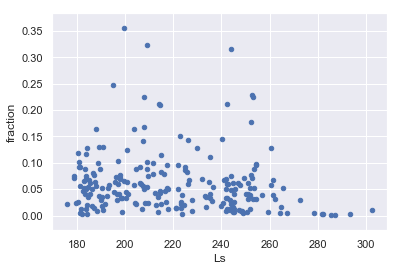

<IPython.core.display.Javascript object>

In [284]:
# shows a general view of the fractional coverage of both fans and blotches over time! neato.
grp_both.plot.scatter(x="Ls", y="fraction")

In [12]:
# group 'both by region'
bbr = grp_both.groupby("region_name")

<IPython.core.display.Javascript object>

In [13]:
all_regions = get_region_names().roi_name.unique()

<IPython.core.display.Javascript object>

In [14]:
all_regions = [
    region for region in all_regions if region not in ["unknown", "Manhattan2"]
]

<IPython.core.display.Javascript object>

In [15]:
all_regions

['Macclesfield',
 'Starburst',
 'Manhattan_Classic',
 'Wellington',
 'Albany',
 'Bilbao',
 'Ithaca',
 'Portsmouth',
 'Pisaq',
 'Manhattan_Frontinella',
 'BuenosAires',
 'Inca_City_Ridges',
 'Inca_City',
 'Giza',
 'Potsdam',
 'Troy',
 'Oswego_Edge',
 'Halifax',
 'Caterpillar',
 'Rochester',
 'Manhattan_Cracks',
 'Schenectady',
 'Binghamton',
 'Atka',
 'Cortland',
 'Geneseo']

<IPython.core.display.Javascript object>

In [45]:
# remembering how to properly select dataframes
grp_both[grp_both["region_name"] == "Macclesfield"]

,Latitude,Ls,MY,fraction,obsid,region_name,which
0,-85.4074,214.785,29,0.115,ESP_012079_0945,Macclesfield,both
1,-85.4065,183.727,29,0.070,ESP_011407_0945,Macclesfield,both
2,-85.4056,198.040,29,0.072,ESP_011723_0945,Macclesfield,both
3,-85.4049,207.892,29,0.168,ESP_011934_0945,Macclesfield,both
4,-85.4067,235.282,29,0.111,ESP_012501_0945,Macclesfield,both
5,-85.4117,224.964,29,0.087,ESP_012290_0945,Macclesfield,both
6,-85.4086,183.683,29,0.074,ESP_011406_0945,Macclesfield,both
7,-85.4041,243.978,30,0.049,ESP_021494_0945,Macclesfield,both
8,-85.4071,209.383,30,0.075,ESP_020782_0945,Macclesfield,both
9,-85.4086,206.269,30,0.062,ESP_020716_0945,Macclesfield,both


<IPython.core.display.Javascript object>

In [31]:
x = grp_both[grp_both["region_name"] == "Macclesfield"]

In [32]:
x.head()

,Ls,MY,fraction,obsid,region_name,which
0,214.785,29.0,0.115,ESP_012079_0945,Macclesfield,both
1,183.727,29.0,0.070,ESP_011407_0945,Macclesfield,both
2,198.040,29.0,0.072,ESP_011723_0945,Macclesfield,both
3,207.892,29.0,0.168,ESP_011934_0945,Macclesfield,both
4,235.282,29.0,0.111,ESP_012501_0945,Macclesfield,both


Text(0.5, 1.0, 'Macclesfield')

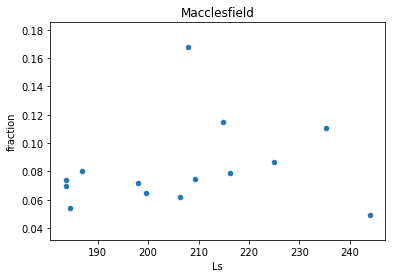

In [33]:
x.plot.scatter(x="Ls", y="fraction")
plt.title("Macclesfield")

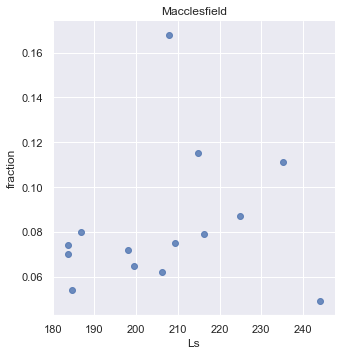

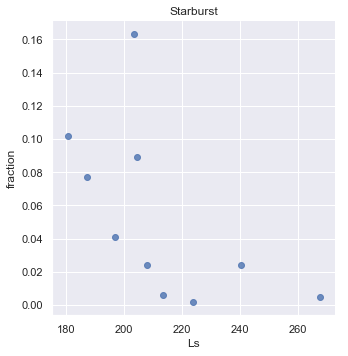

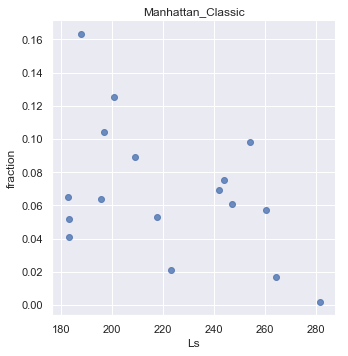

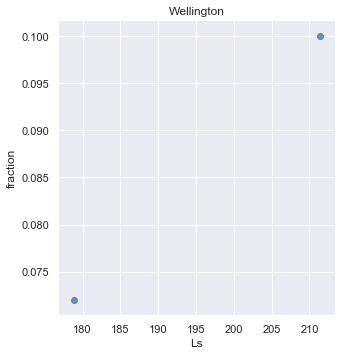

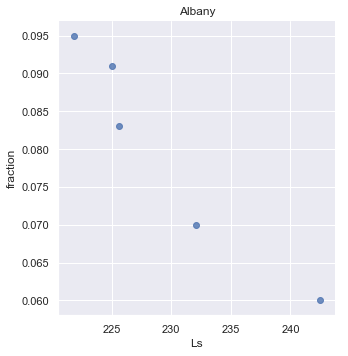

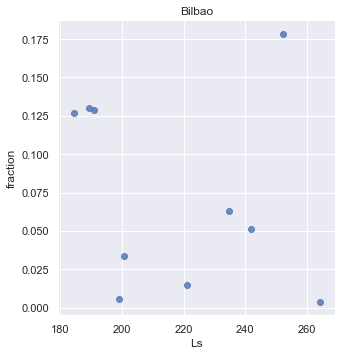

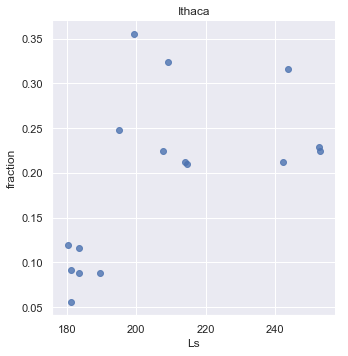

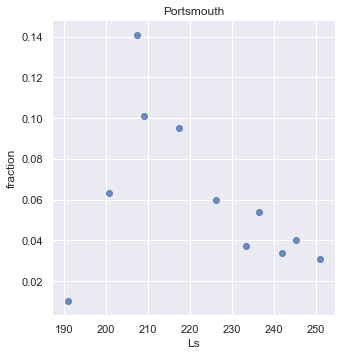

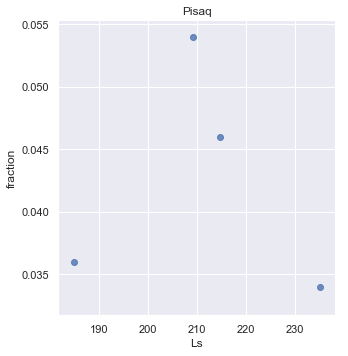

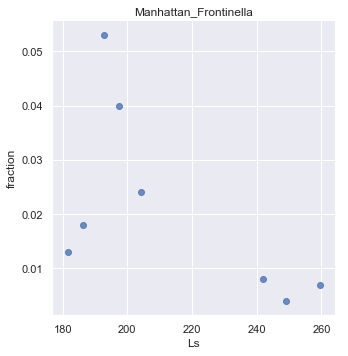

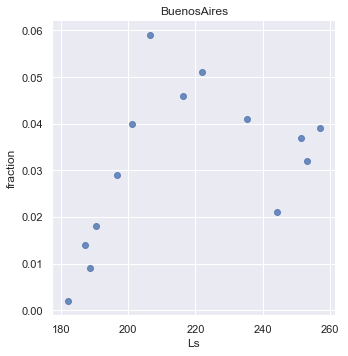

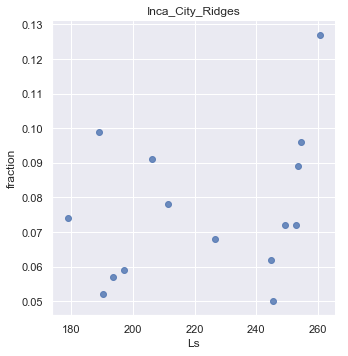

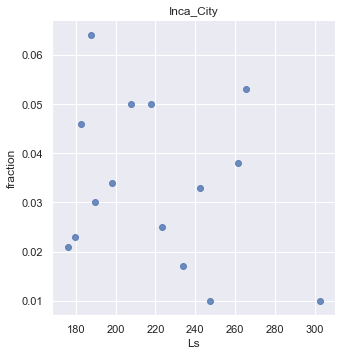

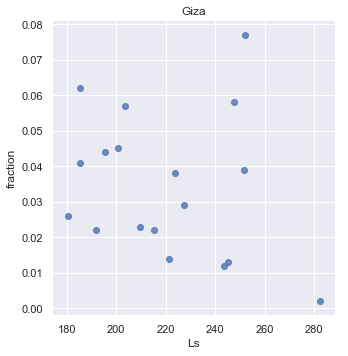

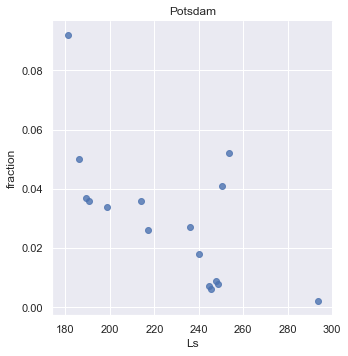

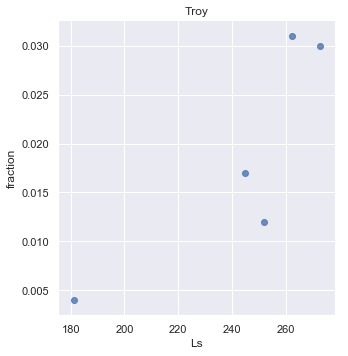

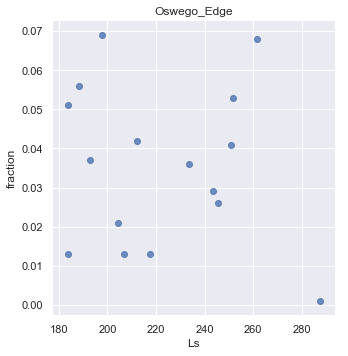

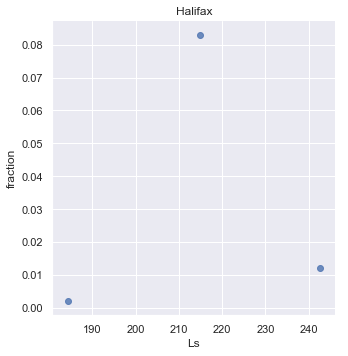

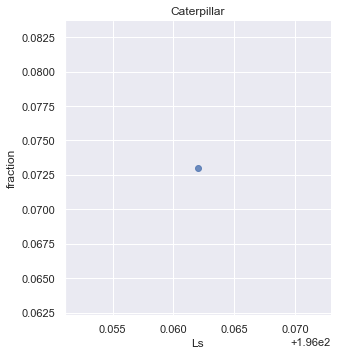

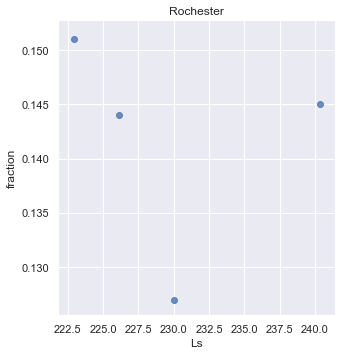

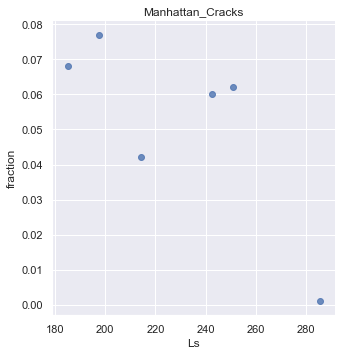

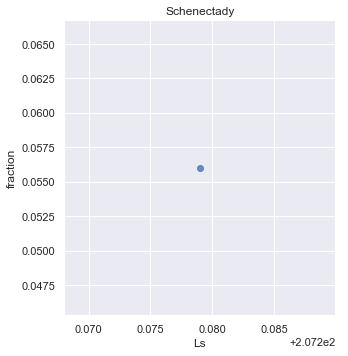

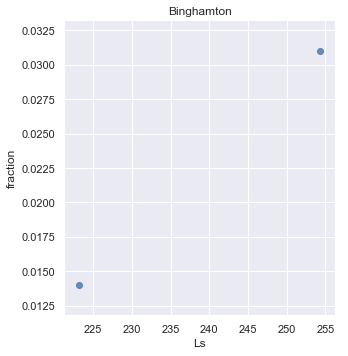

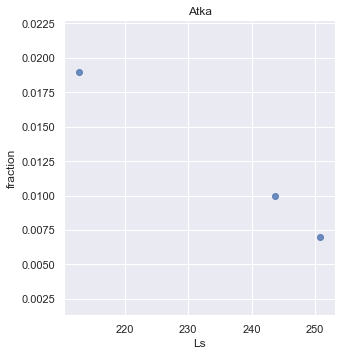

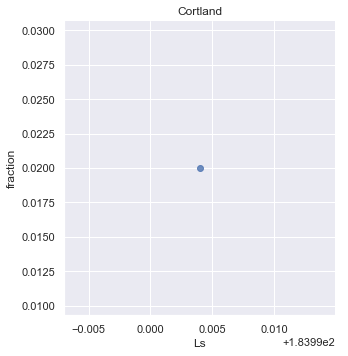

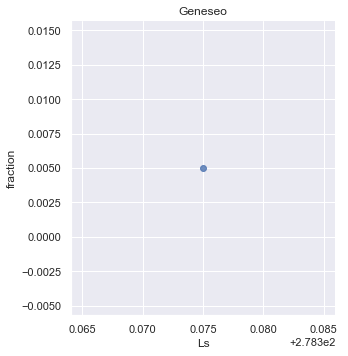

<IPython.core.display.Javascript object>

In [290]:
for region_s in all_regions:
    x = grp_both[grp_both["region_name"] == region_s]
    sns.lmplot("Ls", "fraction", data=x, fit_reg=False)
    plt.title(region_s)

In [46]:
import seaborn as sns

sns.set(style="darkgrid")

<IPython.core.display.Javascript object>

In [9]:
p_data

,Latitude,Ls,MY,fraction,obsid,region_name,which
0,-85.4074,214.785,29,0.115,ESP_012079_0945,Macclesfield,both
1,-85.4065,183.727,29,0.070,ESP_011407_0945,Macclesfield,both
2,-85.4056,198.040,29,0.072,ESP_011723_0945,Macclesfield,both
3,-85.4049,207.892,29,0.168,ESP_011934_0945,Macclesfield,both
4,-85.4067,235.282,29,0.111,ESP_012501_0945,Macclesfield,both
5,-85.4117,224.964,29,0.087,ESP_012290_0945,Macclesfield,both
6,-85.4086,183.683,29,0.074,ESP_011406_0945,Macclesfield,both
7,-85.4041,243.978,30,0.049,ESP_021494_0945,Macclesfield,both
8,-85.4071,209.383,30,0.075,ESP_020782_0945,Macclesfield,both
9,-85.4086,206.269,30,0.062,ESP_020716_0945,Macclesfield,both


<IPython.core.display.Javascript object>

In [48]:
for region_s in all_regions:
    x = grp_both[grp_both["region_name"] == region_s]
    print(x.shape)

(14, 7)
(10, 7)
(17, 7)
(2, 7)
(5, 7)
(10, 7)
(16, 7)
(11, 7)
(4, 7)
(8, 7)
(14, 7)
(15, 7)
(15, 7)
(18, 7)
(16, 7)
(5, 7)
(16, 7)
(3, 7)
(1, 7)
(4, 7)
(6, 7)
(1, 7)
(2, 7)
(3, 7)
(1, 7)
(1, 7)


<IPython.core.display.Javascript object>

In [117]:
small_regions = []
large_regions = []
for region_s in all_regions:
    x = grp_both[grp_both["region_name"] == region_s]
    if x.shape[0] < 6:
        small_regions.append(region_s)
    else:
        large_regions.append(region_s)

<IPython.core.display.Javascript object>

In [118]:
print(small_regions)
print(large_regions)

['Wellington', 'Albany', 'Pisaq', 'Troy', 'Halifax', 'Caterpillar', 'Rochester', 'Schenectady', 'Binghamton', 'Atka', 'Cortland', 'Geneseo']
['Macclesfield', 'Starburst', 'Manhattan_Classic', 'Bilbao', 'Ithaca', 'Portsmouth', 'Manhattan_Frontinella', 'BuenosAires', 'Inca_City_Ridges', 'Inca_City', 'Giza', 'Potsdam', 'Oswego_Edge', 'Manhattan_Cracks']


<IPython.core.display.Javascript object>

In [119]:
large_data = grp_both[grp_both["region_name"].isin(large_regions)]
small_data = grp_both[grp_both["region_name"].isin(small_regions)]

<IPython.core.display.Javascript object>

In [120]:
large_data.head()
# small_data.head()

,Latitude,Ls,MY,fraction,obsid,region_name,which
0,-85.4074,214.785,29,0.115,ESP_012079_0945,Macclesfield,both
1,-85.4065,183.727,29,0.070,ESP_011407_0945,Macclesfield,both
2,-85.4056,198.040,29,0.072,ESP_011723_0945,Macclesfield,both
3,-85.4049,207.892,29,0.168,ESP_011934_0945,Macclesfield,both
4,-85.4067,235.282,29,0.111,ESP_012501_0945,Macclesfield,both


<IPython.core.display.Javascript object>

In [18]:
x = grp_both[grp_both["region_name"].isin(all_regions)]

<IPython.core.display.Javascript object>

In [19]:
x.head()

,Latitude,Ls,MY,fraction,obsid,region_name,which
0,-85.4074,214.785,29,0.115,ESP_012079_0945,Macclesfield,both
1,-85.4065,183.727,29,0.070,ESP_011407_0945,Macclesfield,both
2,-85.4056,198.040,29,0.072,ESP_011723_0945,Macclesfield,both
3,-85.4049,207.892,29,0.168,ESP_011934_0945,Macclesfield,both
4,-85.4067,235.282,29,0.111,ESP_012501_0945,Macclesfield,both


<IPython.core.display.Javascript object>

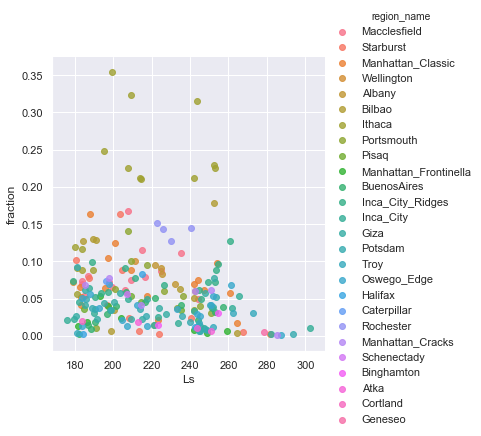

<IPython.core.display.Javascript object>

In [55]:
sns.lmplot("Ls", "fraction", hue="region_name", data=x, fit_reg=False)
plt.savefig("ColorPlotAll.png")

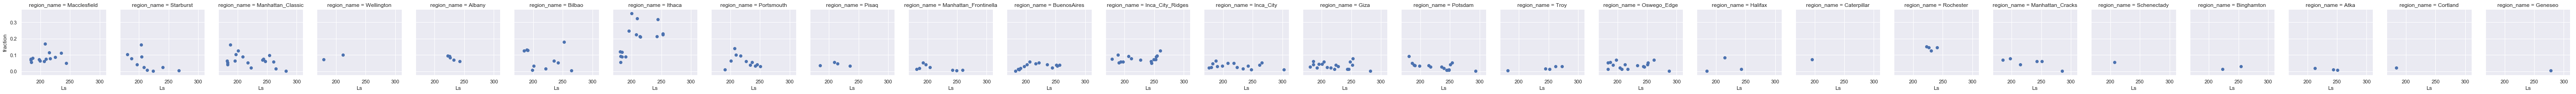

<IPython.core.display.Javascript object>

In [56]:
g = sns.FacetGrid(x, col="region_name")
g.map(plt.scatter, "Ls", "fraction")
plt.savefig("Side_by_sides.png")

In [123]:
# foo = df.ix[(df['column1']==value) | (df['columns2'] == 'b') | (df['column3'] == 'c')]
smallx = x.loc[(x["region_name"].isin(small_regions))]
largex = x.loc[(x["region_name"].isin(large_regions))]

<IPython.core.display.Javascript object>

In [124]:
smallx.head()

,Latitude,Ls,MY,fraction,obsid,region_name,which
41,-82.1867,211.399,29,0.100,ESP_012008_0975,Wellington,both
42,-82.1965,178.833,29,0.072,ESP_011296_0975,Wellington,both
43,-81.9405,232.092,29,0.070,ESP_012436_0980,Albany,both
44,-81.9366,225.013,29,0.091,ESP_012291_0980,Albany,both
45,-81.9383,242.477,29,0.060,ESP_012647_0980,Albany,both


<IPython.core.display.Javascript object>

No handles with labels found to put in legend.


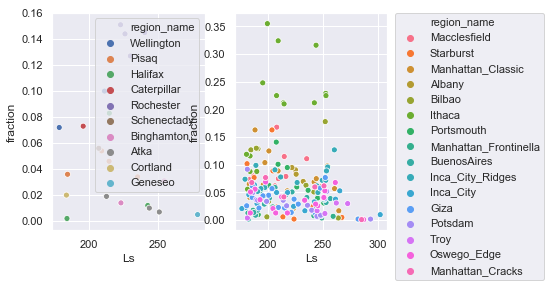

<IPython.core.display.Javascript object>

In [387]:
fig, ax = plt.subplots(ncols=2)
sns.scatterplot(
    data=smallx,
    x="Ls",
    y="fraction",
    hue="region_name",
    ax=ax[0],
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

sns.scatterplot(
    data=largex,
    x="Ls",
    y="fraction",
    hue="region_name",
    ax=ax[1],
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [100]:
x.region_name.unique()

array(['Macclesfield', 'Starburst', 'Manhattan_Classic', 'Wellington',
       'Albany', 'Bilbao', 'Ithaca', 'Portsmouth', 'Pisaq',
       'Manhattan_Frontinella', 'BuenosAires', 'Inca_City_Ridges',
       'Inca_City', 'Giza', 'Potsdam', 'Troy', 'Oswego_Edge', 'Halifax',
       'Caterpillar', 'Rochester', 'Manhattan_Cracks', 'Schenectady',
       'Binghamton', 'Atka', 'Cortland', 'Geneseo'], dtype=object)

<IPython.core.display.Javascript object>

In [110]:
x.head()

,Latitude,Ls,MY,fraction,obsid,region_name,which
0,-85.4074,214.785,29,0.115,ESP_012079_0945,Macclesfield,both
1,-85.4065,183.727,29,0.070,ESP_011407_0945,Macclesfield,both
2,-85.4056,198.040,29,0.072,ESP_011723_0945,Macclesfield,both
3,-85.4049,207.892,29,0.168,ESP_011934_0945,Macclesfield,both
4,-85.4067,235.282,29,0.111,ESP_012501_0945,Macclesfield,both


<IPython.core.display.Javascript object>

In [39]:
# gives average lat per region
for region in x.region_name.unique():
    y = x.query("region_name == @region")
    meanlat = y["Latitude"].mean()
    print(meanlat)

-85.40732857142858
-81.81082999999998
-86.39344705882354
-82.1916
-81.94030000000001
-87.01002000000001
-85.19655
-87.30305454545454
-86.84485
-86.99476250000001
-81.91184285714284
-81.46197333333333
-81.37265333333332
-84.83578333333332
-81.69366875
-85.03654
-87.0107625
-87.04293333333334
-74.2302
-83.22299999999998
-86.25891666666666
-85.0057
-73.48310000000001
-86.98466666666667
-82.6986
-85.1719


<IPython.core.display.Javascript object>

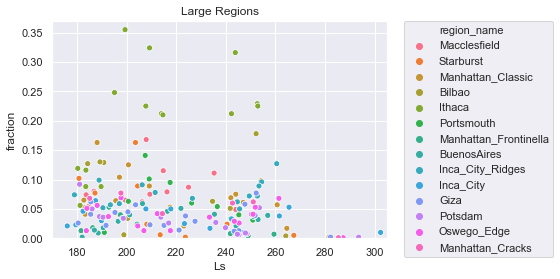

<IPython.core.display.Javascript object>

In [130]:
# plots regions with 6 or more data points
fig, ax = plt.subplots()
sns.scatterplot(
    data=largex,
    x="Ls",
    y="fraction",
    hue="region_name",
    # style="region_name",
    legend="full",
)
plt.title("Large Regions")
plt.xlim(170, 305)
plt.ylim(0, 0.37)

# plt.legend(x.region_name.unique())
# plt.legend(x.Latitude)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.savefig("LargeRegions.png", bbox_inches="tight")

# plt.savefig('X:/' + newName + '.png', bbox_inches='tight')

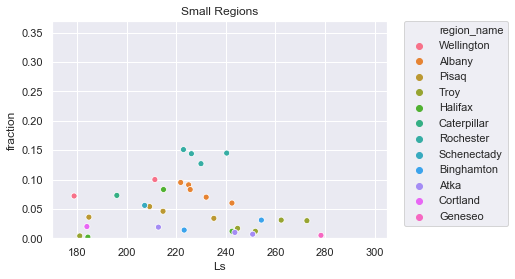

<IPython.core.display.Javascript object>

In [129]:
# plots regions with 1 to 5 data points
fig, ax = plt.subplots()
sns.scatterplot(
    data=smallx,
    x="Ls",
    y="fraction",
    hue="region_name",
    # style="region_name",
    legend="full",
)
plt.title("Small Regions")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.xlim(170, 305)
plt.ylim(0, 0.37)
plt.savefig("SmallRegions.png", bbox_inches="tight")

In [10]:
p_data.head()

,Latitude,Ls,MY,fraction,obsid,region_name,which
0,-85.4074,214.785,29,0.115,ESP_012079_0945,Macclesfield,both
1,-85.4065,183.727,29,0.070,ESP_011407_0945,Macclesfield,both
2,-85.4056,198.040,29,0.072,ESP_011723_0945,Macclesfield,both
3,-85.4049,207.892,29,0.168,ESP_011934_0945,Macclesfield,both
4,-85.4067,235.282,29,0.111,ESP_012501_0945,Macclesfield,both


<IPython.core.display.Javascript object>

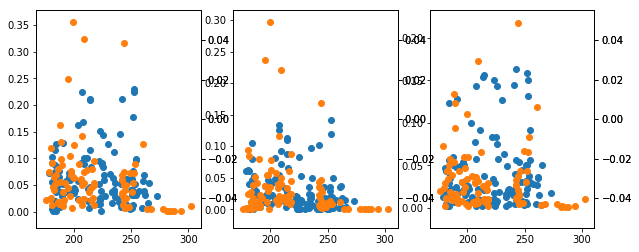

<IPython.core.display.Javascript object>

In [27]:
fig, axes = plt.subplots(ncols=3, figsize=(10, 4), constrained_layout=True)
#need another for loop, to go through each region, add region names and legends for colors, rescale x and y axes properly 
#for all so that they're al lthe same

for ax, select in zip(axes, ['both', 'fans', 'blotches']):
    subdf = p_data.loc[p_data["which"] == select]
    for year in [29, 30]:
        subdf2 = subdf.loc[subdf["MY"] == year]
        subdf2.groupby("Ls").count()
        ax.scatter("Ls", "fraction", data = subdf2)
        ax2 = ax.twinx()
        ax2.plot()
        
        
        
        
        
        
        
        
fig, axes = plt.subplots(ncols=3, figsize=(10, 4))
#need another for loop, to go through each region, add region names and legends for colors, rescale x and y axes properly 
#for all so that they're al lthe same

for ax, select in zip(axes, ['both', 'fans', 'blotches']):
    subdf = p_data.loc[p_data["which"] == select]
    for year in [29, 30]:
        subdf2 = subdf.loc[subdf["MY"] == year]
        subdf2.groupby("Ls").count()
        ax.scatter("Ls", "fraction", data = subdf2)
        ax2 = ax.twinx()
        ax2.plot()

In [1]:
# need another for loop, to go through each region, add region names and legends for colors, rescale x and y axes properly
# for all so that they're al lthe samefig, axes = plt.subplots(ncols=3, nrows=len(all_regions), figsize=(10, 4))
#rerun loop, store # obj of shapely that went into the fractional coverage (union.length)
#also store the union.area (answer is in pixels)
for region in all_regions:
    fig, axes = plt.subplots(nrows=len(all_regions), ncols=3, figsize=(20, 8))
    for ax, select in zip(axes, ["both", "fans", "blotches"]):
        subdf = p_data.loc[p_data["which"] == select]
        for year in [29, 30]:
            subdf2 = subdf.loc[subdf["MY"] == year]
            grouped = subdf2.groupby("Ls").count()
            ax.scatter("Ls", "fraction", data=subdf2)
            ax2 = ax.twinx()
            ax2.plot(grouped)
    fig.savefig(#give fstring name in here, make logical for the region.png, dpi=150)

NameError: name 'all_regions' is not defined

In [ ]:
#try and accept loop 
#git merge puts them into local files
#git fetch just updates whats available to make current files
#git status gives a modified tag